In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

from urllib.request import urlopen 
from bs4 import BeautifulSoup
import re

In [37]:
url ="https://www.hubertiming.com/results/2018MLK"

html=urlopen(url)

In [38]:
soup = BeautifulSoup(html)

In [39]:
title = soup.title
print(title)  # <title>
print(title.text)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [40]:
links = soup.find_all('a', href=True)
for link in links:
        print(link.get('href'))


https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [41]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_data = row.find_all("td")
    dataRow = []
    for cell in row_data:
        dataRow.append(cell.text)
    data.append(dataRow)
data = data[4:]  # Skip the header row
print(data[-2:])  

[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [42]:
df = pd.DataFrame(data)
print(df.head(2))

     0     1                                                  2     3     4   \
0  None  None                                               None  None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M    29   

           5     6     7      8   \
0        None  None  None   None   
1  WASHINGTON    DC  5:25  16:48   

                                                  9        10  \
0                                               None     None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...  M 21-39   

                                                  11    12     13  
0                                               None  None   None  
1  \r\n\r\n                    1 of 33\r\n\r\n   ...  0:08  16:56  


In [43]:
header_list = []
col_headers = soup.find_all("th")
for col in col_headers:
    header_list.append(col.text)

print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [44]:
df.columns = header_list
print(df.head())


  Place   Bib                                               Name Gender   Age  \
0  None  None                                               None   None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...      M    29   
2     2  1080  \r\n\r\n                    NEED NAME KAISER R...      M    25   
3     3  1275  \r\n\r\n                    DAN FRANEK\r\n\r\n...      M    52   
4     4  1223  \r\n\r\n                    PAUL TAYLOR\r\n\r\...      M    54   

         City State Chip Pace   Time  \
0        None  None      None   None   
1  WASHINGTON    DC      5:25  16:48   
2    PORTLAND    OR      5:39  17:31   
3    PORTLAND    OR      5:53  18:15   
4    PORTLAND    OR      5:58  18:31   

                                        Gender Place Age Group  \
0                                               None      None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...   M 21-39   
2  \r\n\r\n                    2 of 78\r\n\r\n   ...   M 21-39   
3  \r\n\

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Time             191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.1+ KB


In [47]:
df.describe(include='all')

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
count,191,191,191,191,191,191,191,191,191,191,191,191,191,191
unique,191,191,190,2,55,22,6,152,170,191,9,191,45,178
top,1,1191,\r\n\r\n UNKNOWN RUNNER SEE...,F,,PORTLAND,OR,20:00,25:01,\r\n\r\n 1 of 78\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:29,27:00
freq,1,1,2,113,9,130,149,4,2,1,53,1,8,2


In [48]:
df.shape


(192, 14)

In [49]:
df2 = df.dropna(how ='any')
df2.shape

(191, 14)

In [58]:
df2['chiptime'] = pd.to_timedelta(df2['Time'] , errors='coerce')
df2['chiptime'] = df2['chiptime'].dt.total_seconds() / 60
df2[['chiptime']].info()

print(df2['chiptime'].head(10)) 


<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 1 to 191
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chiptime  39 non-null     float64
dtypes: float64(1)
memory usage: 3.0 KB
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: chiptime, dtype: float64


/tmp/ipykernel_24244/2293750449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['chiptime'] = pd.to_timedelta(df2['Time'] , errors='coerce')
/tmp/ipykernel_24244/2293750449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['chiptime'] = df2['chiptime'].dt.total_seconds() / 60


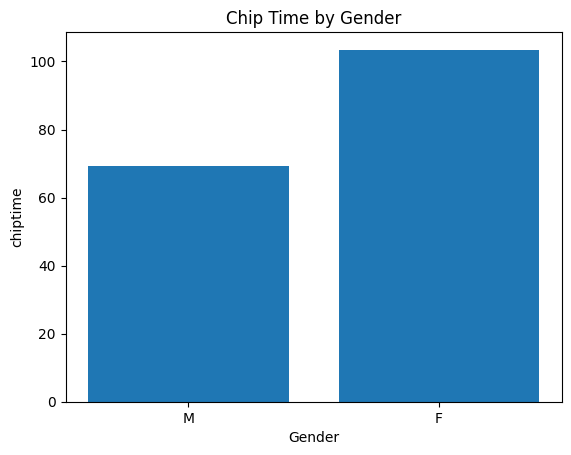

In [60]:
plt.bar(df2['Gender'], df2['chiptime']) 
plt.xlabel('Gender')
plt.ylabel('chiptime')
plt.title('Chip Time by Gender')
plt.show()

In [59]:
df2.describe(include=[np.number])

,chiptime
count,39.000000
mean,64.243162
std,8.482094
min,60.016667
25%,60.800000
50%,62.016667
75%,63.016667
max,103.450000


Text(0, 0.5, 'Run Time (minutes) ')

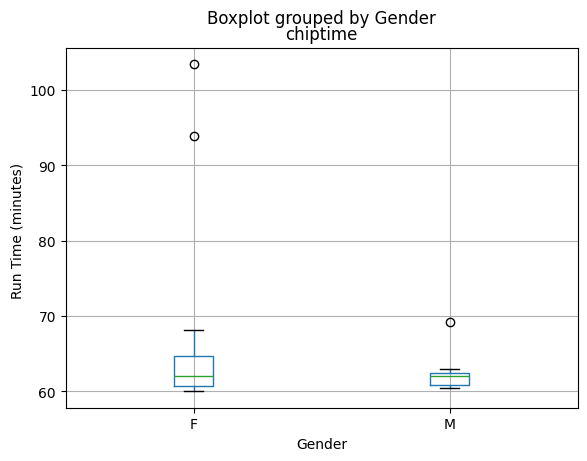

In [64]:
df2.boxplot(column='chiptime', by='Gender')
plt.ylabel('Run Time (minutes) ')

/tmp/ipykernel_24244/3765378589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
/tmp/ipykernel_24244/3765378589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(how='any', inplace=True)


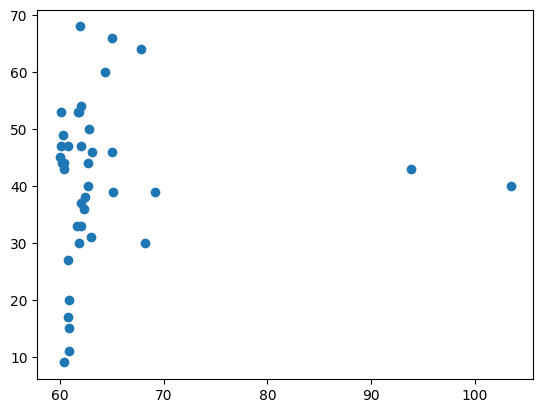

In [70]:
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how='any', inplace=True)

plt.scatter(df2['chiptime'], df2['Age_i'])
plt.show()